In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt_tab')
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , classification_report

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/emotion/test.txt", header=None)
test[['text', 'emotion']] = test[0].str.split(';', n=1, expand=True)
test = test.drop(columns=[0])

In [ ]:
train_data1 =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/emotion/train.txt", header=None)
train_data1[['text', 'emotion']] = train_data1[0].str.split(';', n=1, expand=True)
train_data1 = train_data1.drop(columns=[0])

In [ ]:
train_data1.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
test.head()

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
train_data1["emotion"].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
train_data1['emotion'].value_counts().sort_index()

,count
emotion,
anger,2159
fear,1937
joy,5362
love,1304
sadness,4666
surprise,572


In [ ]:
train_data1.shape

(16000, 2)

In [ ]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [ ]:
train_data = train_data1

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.snowball import SnowballStemmer
sb = SnowballStemmer('english')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean(text):

  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]

  y.clear()

  for i in text:
     if i not in  stopwords.words('english')and i not in string.punctuation:
        y.append(i)

  text = y[:]
  y.clear()

  for i in text:
     y.append(sb.stem(i))

  return " ".join(y)

In [ ]:
train_data['emotion'] = train_data['emotion'].apply(clean)

In [ ]:
test['emotion'] = test['emotion'].apply(clean)

In [ ]:
train_data.head()

,text,emotion
0,i didnt feel humiliated,sad
1,i can go from feeling so hopeless to so damned...,sad
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_data['emotion'] = le.fit_transform(train_data['emotion'])
test['emotion'] = le.transform(test['emotion'])

In [ ]:
train_data.head()

,text,emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


In [ ]:
print(train_data['emotion'].value_counts().sort_index() )
print(train_data1['emotion'].value_counts().sort_index())

emotion
0    2159
1    1937
2    5362
3    1304
4    4666
5     572
Name: count, dtype: int64
emotion
0    2159
1    1937
2    5362
3    1304
4    4666
5     572
Name: count, dtype: int64


In [ ]:
from wordcloud import WordCloud
wc= WordCloud(width=1000 , height=1000 , min_font_size=10 , background_color='white')
from scipy.interpolate import generate_knots

In [ ]:
#plt.imshow(wc.generate(train_data[train_data['emotion']==0]['text'].str.cat(sep=" ")))

In [ ]:
#plt.imshow(wc.generate(train_data[train_data['emotion']==1]['text'].str.cat(sep=" ")))

In [ ]:
#plt.imshow(wc.generate(train_data[train_data['emotion']==2]['text'].str.cat(sep=" ")))

In [ ]:
#plt.imshow(wc.generate(train_data[train_data['emotion']==3]['text'].str.cat(sep=" ")))

In [ ]:
#plt.imshow(wc.generate(train_data[train_data['emotion']==4]['text'].str.cat(sep=" ")))

In [ ]:
#plt.imshow(wc.generate(train_data[train_data['emotion']==5]['text'].str.cat(sep=" ")))

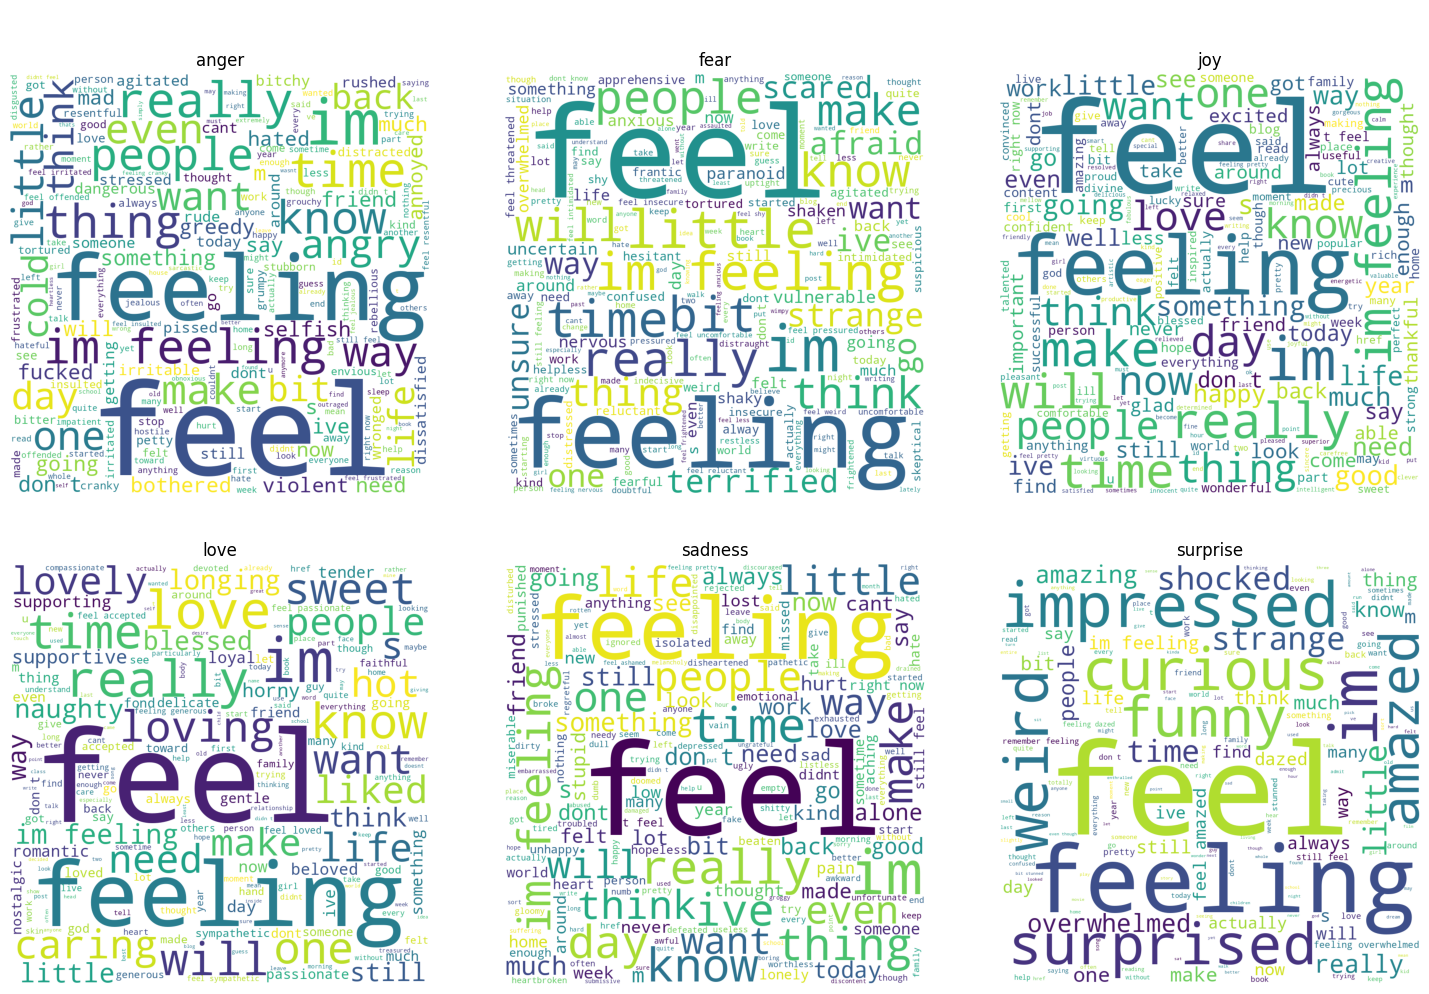

In [ ]:
emotion_labels = {
    0: 'anger',
    1: 'fear',
    2: 'joy',
    3: 'love',
    4: 'sadness',
    5: 'surprise'
}

plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    wordcloud = wc.generate(train_data[train_data['emotion'] == i]['text'].str.cat(sep=" "))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title("\n\n"+emotion_labels[i])
plt.tight_layout()
plt.show()

#Tf-idf

In [ ]:
X = train_data['text']
y = train_data['emotion']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [ ]:
tf= TfidfVectorizer( stop_words='english')

In [ ]:
x_train = tf.fit_transform(x_train).toarray()

In [ ]:
x_test = tf.transform(x_test).toarray()

In [ ]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
def model(model):
  model.fit(x_train , y_train)
  y_pred = model.predict(x_test)
  print("accuracy_score :",accuracy_score(y_test , y_pred))
  print("confusion_matrix :\n",confusion_matrix(y_test , y_pred))
  print("precision_score :\n",precision_score(y_test , y_pred, average='weighted')) # Added with weighted average
  print(classification_report(y_test, y_pred))

In [ ]:
def pre(model, t):
  text = clean(t)
  value = model.predict(tf.transform([text]).toarray())
  return emotion_labels.get(value[0] , "unknown emotion")

In [ ]:
model(gnb)

accuracy_score : 0.3478125
confusion_matrix :
 [[139  75  64  56  68  25]
 [ 38 145  61  34  87  32]
 [124  97 387 144 177  92]
 [ 25  24  86 106  43  12]
 [147 198 113 101 312  75]
 [  6  24  26   8  25  24]]
precision_score :
 0.3928549531436382
              precision    recall  f1-score   support

           0       0.29      0.33      0.31       427
           1       0.26      0.37      0.30       397
           2       0.53      0.38      0.44      1021
           3       0.24      0.36      0.28       296
           4       0.44      0.33      0.38       946
           5       0.09      0.21      0.13       113

    accuracy                           0.35      3200
   macro avg       0.31      0.33      0.31      3200
weighted avg       0.39      0.35      0.36      3200



In [ ]:
model(mnb)

accuracy_score : 0.6646875
confusion_matrix :
 [[134   1 144   0 148   0]
 [  8  98 152   0 139   0]
 [  0   0 998   0  23   0]
 [  2   1 231  12  50   0]
 [  1   1  60   0 884   0]
 [  0   3  66   0  43   1]]
precision_score :
 0.7639553390592836
              precision    recall  f1-score   support

           0       0.92      0.31      0.47       427
           1       0.94      0.25      0.39       397
           2       0.60      0.98      0.75      1021
           3       1.00      0.04      0.08       296
           4       0.69      0.93      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.86      0.42      0.42      3200
weighted avg       0.76      0.66      0.59      3200



In [ ]:
model(bnb)

accuracy_score : 0.6334375
confusion_matrix :
 [[ 89   7 132   0 199   0]
 [  4  58 130   0 205   0]
 [  1   1 976   2  41   0]
 [  1   2 215   3  75   0]
 [  6   2  36   1 901   0]
 [  0   4  55   0  54   0]]
precision_score :
 0.6433406711064562
              precision    recall  f1-score   support

           0       0.88      0.21      0.34       427
           1       0.78      0.15      0.25       397
           2       0.63      0.96      0.76      1021
           3       0.50      0.01      0.02       296
           4       0.61      0.95      0.74       946
           5       0.00      0.00      0.00       113

    accuracy                           0.63      3200
   macro avg       0.57      0.38      0.35      3200
weighted avg       0.64      0.63      0.54      3200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
model(knn)

accuracy_score : 0.7909375
confusion_matrix :
 [[347   8  36   1  34   1]
 [ 30 284  37   2  32  12]
 [ 33  22 902  14  49   1]
 [ 19  10  99 147  21   0]
 [ 47  23  73   6 795   2]
 [  3  17  16   2  19  56]]
precision_score :
 0.7948321734682057
              precision    recall  f1-score   support

           0       0.72      0.81      0.77       427
           1       0.78      0.72      0.75       397
           2       0.78      0.88      0.83      1021
           3       0.85      0.50      0.63       296
           4       0.84      0.84      0.84       946
           5       0.78      0.50      0.61       113

    accuracy                           0.79      3200
   macro avg       0.79      0.71      0.74      3200
weighted avg       0.79      0.79      0.79      3200



In [ ]:
text = "I can't believe they treated me like that; it makes me so angry."
text1 = "I felt terrified walking alone in the dark last night."
text2 = "I was so happy when I saw my exam results; it made my whole day."
text3 = "I feel so deeply connected to you; being with you makes me feel loved"
text4 = "I felt heartbroken after hearing the bad news."
text5 = "I didn’t expect this at all; it was a complete surprise to me!"

In [ ]:
emotion_labels

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'surprise'}

In [ ]:
pre(knn , text)

'joy'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
model(rf)

accuracy_score : 0.8809375
confusion_matrix :
 [[374  10  25   3  14   1]
 [ 14 346  12   1  13  11]
 [  5   9 949  27  29   2]
 [  5   5  72 209   5   0]
 [ 28  17  31   5 862   3]
 [  0  25   7   0   2  79]]
precision_score :
 0.8810642465547018
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       427
           1       0.84      0.87      0.86       397
           2       0.87      0.93      0.90      1021
           3       0.85      0.71      0.77       296
           4       0.93      0.91      0.92       946
           5       0.82      0.70      0.76       113

    accuracy                           0.88      3200
   macro avg       0.87      0.83      0.85      3200
weighted avg       0.88      0.88      0.88      3200



In [ ]:
pre(RandomForestClassifier() , text)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#bow

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X = train_data['text']
y = train_data['emotion']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [ ]:
cv = CountVectorizer()

In [ ]:
x_train = cv.fit_transform(x_train).toarray()

In [ ]:
x_test = cv.transform(x_test).toarray()

In [ ]:
model(gnb)

accuracy_score : 0.365
confusion_matrix :
 [[139  89  48  62  66  23]
 [ 31 168  40  41  82  35]
 [113 110 376 154 179  89]
 [ 22  24  77 125  37  11]
 [134 216  67 114 336  79]
 [  5  26  23   9  26  24]]
precision_score :
 0.42778506153993745
              precision    recall  f1-score   support

           0       0.31      0.33      0.32       427
           1       0.27      0.42      0.33       397
           2       0.60      0.37      0.46      1021
           3       0.25      0.42      0.31       296
           4       0.46      0.36      0.40       946
           5       0.09      0.21      0.13       113

    accuracy                           0.36      3200
   macro avg       0.33      0.35      0.32      3200
weighted avg       0.43      0.36      0.38      3200



In [ ]:
model(mnb)

accuracy_score : 0.7390625
confusion_matrix :
 [[240  12  67   0 108   0]
 [ 13 197  91   0  96   0]
 [  3   1 987   2  28   0]
 [  7   4 190  48  47   0]
 [  5   2  49   1 889   0]
 [  0  15  53   1  40   4]]
precision_score :
 0.7827013791685835
              precision    recall  f1-score   support

           0       0.90      0.56      0.69       427
           1       0.85      0.50      0.63       397
           2       0.69      0.97      0.80      1021
           3       0.92      0.16      0.28       296
           4       0.74      0.94      0.83       946
           5       1.00      0.04      0.07       113

    accuracy                           0.74      3200
   macro avg       0.85      0.53      0.55      3200
weighted avg       0.78      0.74      0.70      3200



In [ ]:
model(bnb)

accuracy_score : 0.639375
confusion_matrix :
 [[105   6 102   0 214   0]
 [  4  60 113   0 220   0]
 [  0   1 983   2  35   0]
 [  0   2 212   5  77   0]
 [ 12   2  37   2 893   0]
 [  0   4  54   0  55   0]]
precision_score :
 0.6520869760322087
              precision    recall  f1-score   support

           0       0.87      0.25      0.38       427
           1       0.80      0.15      0.25       397
           2       0.65      0.96      0.78      1021
           3       0.56      0.02      0.03       296
           4       0.60      0.94      0.73       946
           5       0.00      0.00      0.00       113

    accuracy                           0.64      3200
   macro avg       0.58      0.39      0.36      3200
weighted avg       0.65      0.64      0.55      3200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:
model(knn)

accuracy_score : 0.3909375
confusion_matrix :
 [[140  33 126   7 119   2]
 [ 65  82 143  12  91   4]
 [116  57 574  35 237   2]
 [ 49  25 124  25  71   2]
 [122  88 294  18 423   1]
 [ 20  15  39   3  29   7]]
precision_score :
 0.3770501187897199
              precision    recall  f1-score   support

           0       0.27      0.33      0.30       427
           1       0.27      0.21      0.24       397
           2       0.44      0.56      0.49      1021
           3       0.25      0.08      0.13       296
           4       0.44      0.45      0.44       946
           5       0.39      0.06      0.11       113

    accuracy                           0.39      3200
   macro avg       0.34      0.28      0.28      3200
weighted avg       0.38      0.39      0.37      3200



In [ ]:
rf = RandomForestClassifier(n_estimators=1000 , random_state=42)

In [ ]:
model(rf)

In [ ]:
pre(rf , text1)